#Objetivo:
Predecir el **rendimiento del cultivo de maíz** en distintas provincias de Argentina utilizando datos de producción agrícola.


# Contexto:
El rendimiento de los cultivos está influenciado por diversos factores. Este proyecto busca identificar **patrones en los datos disponibles** para proporcionar **insights accionables** a productores y tomadores de decisiones.


# Problema Comercial:
Determinar qué factores impactan el **rendimiento del maíz** para optimizar la **producción agrícola** en diferentes zonas del país.

# El dataset
##Nombre: Estimaciones agrícolas

## Descripción:
Serie completa de cultivos por campaña, provincia y partido/departamento de Argentina.

## Contenido de los datos:
- **Superficie sembrada**  
- **Superficie cosechada**  
- **Producción**  
- **Rendimiento**

## Fuente:
[Datos.gob.ar - Estimaciones agrícolas](https://www.datos.gob.ar/dataset/agroindustria-agricultura---estimaciones-agricolas/archivo/agroindustria_95d066e6-8a0f-4a80-b59d-6f28f88eacd5)


## Cargamos el dataset

In [5]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [6]:
# Cargamos el dataset
url = 'https://drive.google.com/uc?id=1aM13OA_HFjz8ct_fAxEeO1O4ZCscSMlQ'
dataset = pd.read_csv(url, encoding='latin1')
dataset

,provincia_id,provincia_nombre,departamento_id,departamento_nombre,id_cultivo,cultivo,id_ciclo,ciclo,sup_sembrada,sup_cosechada,produccion,rendimiento
0,6,Buenos Aires,854,25 de Mayo,1.0,Ajo,1,1969/1970,3,3,10,3333
1,6,Buenos Aires,14,Adolfo Gonzales Chaves,1.0,Ajo,1,1969/1970,15,15,82,5467
2,6,Buenos Aires,21,Alberti,1.0,Ajo,1,1969/1970,5,5,7,1400
3,6,Buenos Aires,28,Almirante Brown,1.0,Ajo,1,1969/1970,2,2,8,4000
4,6,Buenos Aires,77,Arrecifes,1.0,Ajo,1,1969/1970,6,6,15,2500
...,...,...,...,...,...,...,...,...,...,...,...,...
153884,90,Tucuman,49,La Cocha,28.0,Trigo total,53,2022/2023,11880,10440,7308,700
153885,90,Tucuman,56,Leales,28.0,Trigo total,53,2022/2023,15300,14325,8595,600
153886,90,Tucuman,63,Lules,28.0,Trigo total,53,2022/2023,300,300,330,1100
153887,90,Tucuman,91,Simoca,28.0,Trigo total,53,2022/2023,200,200,200,1000


In [18]:
# Especificar las columnas numéricas relevantes
numeric_columns = ['sup_sembrada', 'sup_cosechada', 'produccion', 'rendimiento']

# Aplicar el filtro y convertir columnas a formato numérico
maiz_data = dataset[dataset['cultivo'].str.strip().str.lower() == 'maíz']

for col in numeric_columns:
    maiz_data[col] = pd.to_numeric(maiz_data[col], errors='coerce')

# Verificar los resultados
maiz_data.head()

,provincia_id,provincia_nombre,departamento_id,departamento_nombre,id_cultivo,cultivo,id_ciclo,ciclo,sup_sembrada,sup_cosechada,produccion,rendimiento
2194,6,Buenos Aires,854,25 de Mayo,32.0,Maíz,1,1969/1970,36000,33000.0,102300.0,3100.0
2195,6,Buenos Aires,588,9 de Julio,32.0,Maíz,1,1969/1970,25000,23000.0,73600.0,3200.0
2196,6,Buenos Aires,7,Adolfo Alsina,32.0,Maíz,1,1969/1970,9000,5000.0,6500.0,1300.0
2197,6,Buenos Aires,14,Adolfo Gonzales Chaves,32.0,Maíz,1,1969/1970,1400,150.0,210.0,1400.0
2198,6,Buenos Aires,21,Alberti,32.0,Maíz,1,1969/1970,14400,14000.0,48000.0,3429.0


In [20]:
maiz_data.describe().T.round(2)


,count,mean,std,min,25%,50%,75%,max
provincia_id,17115.0,34.16,29.30,6.0,6.0,22.0,58.0,90.0
departamento_id,17115.0,186.98,221.47,0.0,49.0,98.0,182.0,882.0
id_cultivo,17115.0,32.00,0.00,32.0,32.0,32.0,32.0,32.0
id_ciclo,17115.0,25.51,15.86,1.0,11.0,24.0,40.0,53.0
sup_sembrada,17115.0,14245.19,31242.31,1.0,800.0,4000.0,15000.0,563000.0
sup_cosechada,17114.0,11464.24,27227.53,0.0,500.0,3000.0,11300.0,525000.0
produccion,17113.0,60729.34,171149.27,0.0,1200.0,9250.0,46800.0,3412500.0
rendimiento,17113.0,3616.12,2418.28,0.0,1700.0,3000.0,5103.0,33333.0


#Realizamos impieza y el análisis exploratorio (EDA).<br>
Esto incluirá:<br>
<ol>
<li>Detección de valores nulos y anómalos.
<li>Distribución de las variables clave como superficie sembrada, cosechada y rendimiento.
<li>Visualización inicial del rendimiento promedio por provincia.
</ol>

(sup_sembrada     0
 sup_cosechada    1
 produccion       2
 rendimiento      2
 dtype: int64,
 provincia_nombre
 Buenos Aires    4911.405275
 Santa Fe        4677.492172
 Cordoba         4424.439906
 Entre Rios      3912.938182
 Tucuman         3562.818575
 Name: rendimiento, dtype: float64)

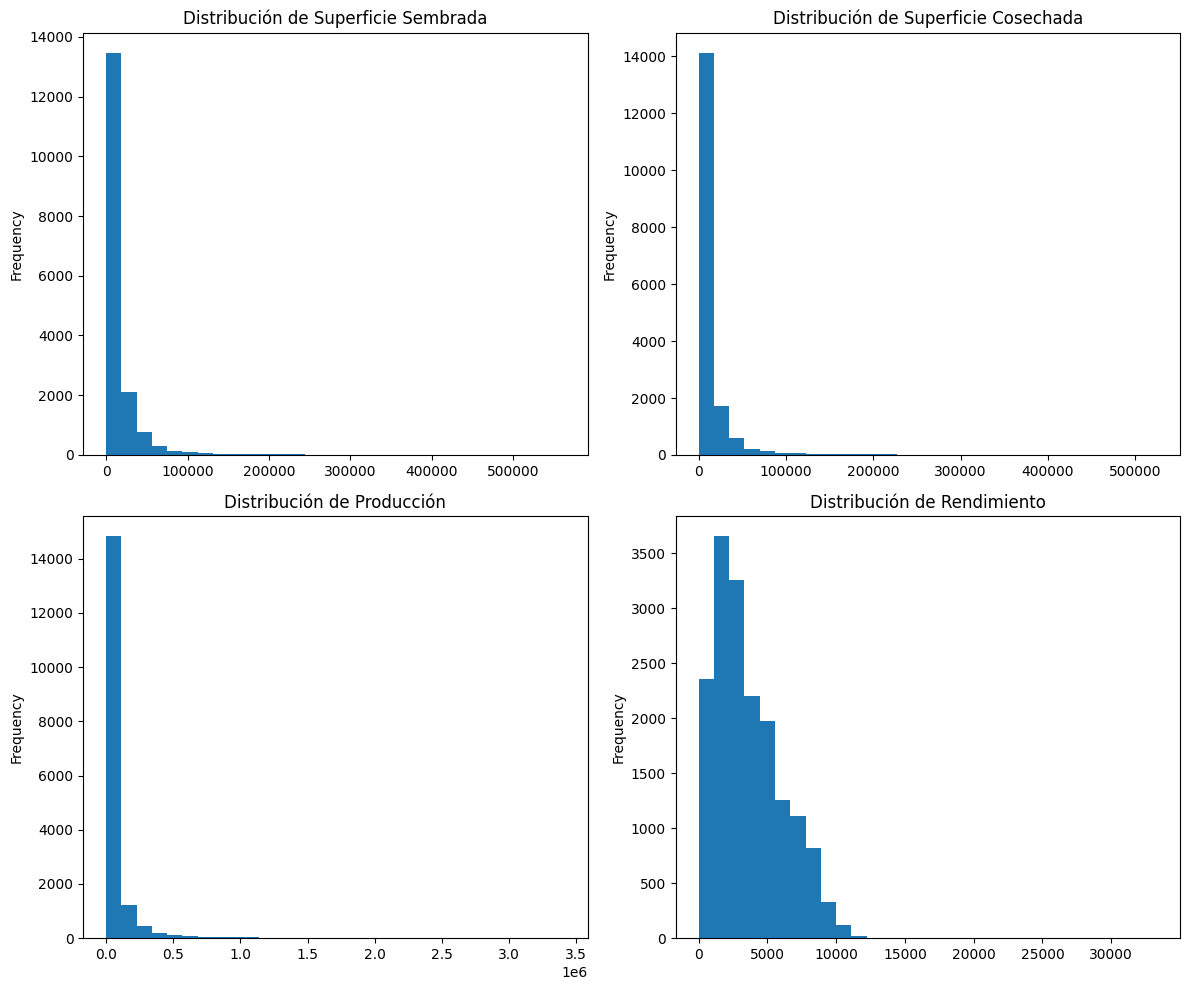

In [9]:
import matplotlib.pyplot as plt

# Revisar valores nulos en las columnas relevantes
missing_values = maiz_data[numeric_columns].isnull().sum()

# Visualizar la distribución de las superficies sembradas y cosechadas
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

maiz_data['sup_sembrada'].plot(kind='hist', bins=30, ax=axes[0, 0], title='Distribución de Superficie Sembrada')
maiz_data['sup_cosechada'].plot(kind='hist', bins=30, ax=axes[0, 1], title='Distribución de Superficie Cosechada')
maiz_data['produccion'].plot(kind='hist', bins=30, ax=axes[1, 0], title='Distribución de Producción')
maiz_data['rendimiento'].plot(kind='hist', bins=30, ax=axes[1, 1], title='Distribución de Rendimiento')

plt.tight_layout()

# Calcular rendimiento promedio por provincia
rendimiento_provincia = maiz_data.groupby('provincia_nombre')['rendimiento'].mean().sort_values(ascending=False)

missing_values, rendimiento_provincia.head()


# Resultados preliminares del EDA

## Valores nulos:
- **sup_cosechada**: 1 registro.
- **producción**: 2 registros.
- **rendimiento**: 2 registros.  
  Estos valores pueden eliminarse o imputarse en el siguiente paso.

## Distribuciones:
- La superficie sembrada y cosechada presentan una distribución sesgada con algunos valores extremos.
- La producción y el rendimiento muestran un rango amplio, lo que indica variabilidad significativa entre registros.

## Rendimiento promedio por provincia:
Las provincias con mayor rendimiento promedio son:
1. **Buenos Aires**: 4.911,41
2. **Santa Fe**: 4.677,49
3. **Córdoba**: 4.424,44

## Próximos pasos:
1. Decidir el manejo de valores nulos.
2. Refinar visualizaciones o agrupar provincias para un análisis más detallado.
3. Proceder con la selección de características.


In [11]:
# Identificar registros con valores nulos en columnas relevantes
registros_nulos = maiz_data[maiz_data[numeric_columns].isnull().any(axis=1)]

# Eliminar registros con valores nulos
maiz_data_cleaned = maiz_data.dropna(subset=numeric_columns)

# Cantidad de registros restantes
registros_restantes = maiz_data_cleaned.shape[0]

# registros_nulos, registros_restantes


## Registros con valores nulos identificados:
- **Bahía Blanca, Buenos Aires (2017/2018)**: Superficie cosechada, producción y rendimiento nulos.
- **Tafí del Valle, Tucumán (2017/2018)**: Producción y rendimiento nulos.

## Eliminación:
- Se han eliminado 2 registros con valores nulos.

## Cantidad de registros restantes:
- El dataset ahora contiene **17.113 registros**.


# Selección de características

## Pasos a seguir:

1. **Revisión de las columnas relevantes**:  
   Identificar aquellas que aporten valor al modelo, eliminando redundantes o irrelevantes.

2. **Análisis de correlación**:  
   Evaluar qué variables están altamente correlacionadas con la variable objetivo (**rendimiento**).

3. **Implementación de un método de selección de características**:  
   Usaremos un enfoque basado en la importancia de las características, como:  
   - **SelectKBest** con pruebas estadísticas.  
   - Modelos como árboles de decisión.


,sup_sembrada,sup_cosechada,produccion,rendimiento
sup_sembrada,1.000000,0.979417,0.901561,0.290678
sup_cosechada,0.979417,1.000000,0.920338,0.292685
produccion,0.901561,0.920338,1.000000,0.404786
rendimiento,0.290678,0.292685,0.404786,1.000000


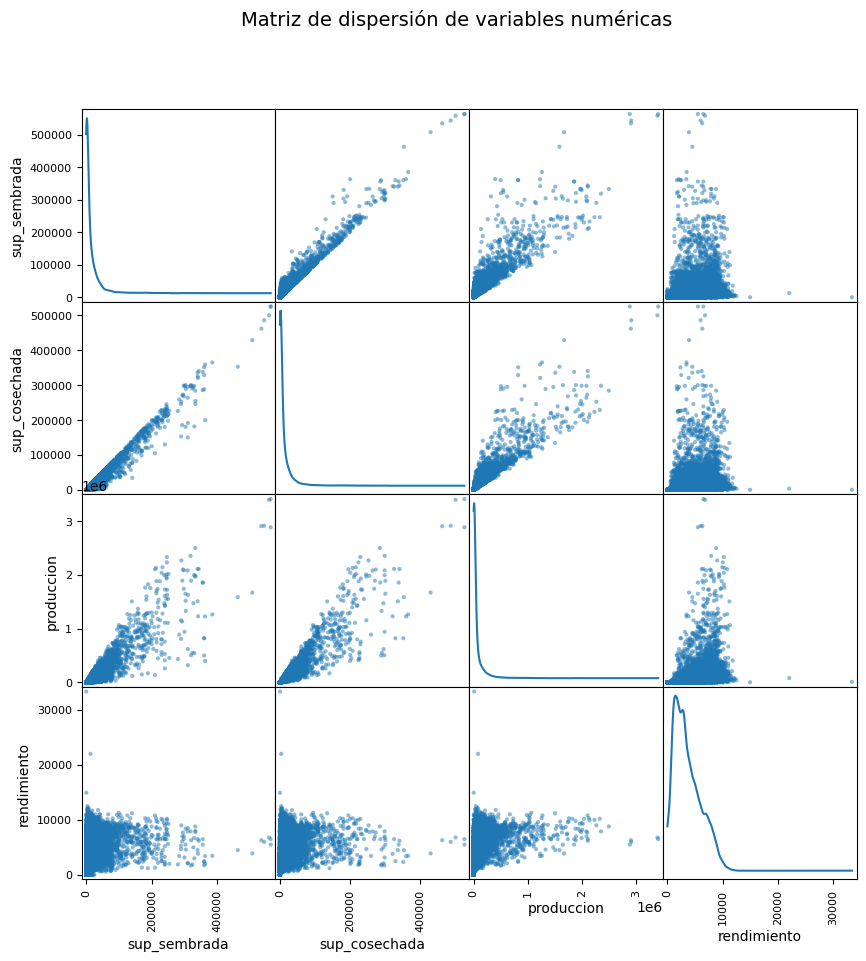

In [15]:
from pandas.plotting import scatter_matrix

# Calcular la correlación entre las variables numéricas
correlation_matrix = maiz_data_cleaned[numeric_columns].corr()

# Visualizar la correlación con un scatter matrix para evaluar relaciones
scatter_matrix(maiz_data_cleaned[numeric_columns], figsize=(10, 10), diagonal='kde')
plt.suptitle("Matriz de dispersión de variables numéricas", fontsize=14)

correlation_matrix


# Análisis de correlación

## Variables altamente correlacionadas:
- **sup_sembrada** y **sup_cosechada** presentan una correlación muy alta (**0,979**), lo que indica redundancia.
- **producción** está fuertemente correlacionada con:
  - **sup_sembrada** (**0,901**).
  - **sup_cosechada** (**0,920**).

## Rendimiento:
- **producción** tiene la mayor correlación con **rendimiento** (**0,405**), aunque es moderada.
- **sup_sembrada** y **sup_cosechada** tienen una baja correlación directa con **rendimiento**.


# Próximo paso

Usaremos un método de selección automática como **SelectKBest** para identificar las características más relevantes. Esto nos ayudará a confirmar qué columnas utilizar para el modelo.

Procederemos a implementar esta técnica en el siguiente paso.


In [13]:
from sklearn.feature_selection import SelectKBest, f_regression

# Separar variables independientes y dependiente
X = maiz_data_cleaned[numeric_columns[:-1]]  # Excluir 'rendimiento' como dependiente
y = maiz_data_cleaned['rendimiento']

# Aplicar SelectKBest con f_regression para seleccionar las mejores características
selector = SelectKBest(score_func=f_regression, k='all')
X_new = selector.fit_transform(X, y)

# Extraer las puntuaciones y columnas seleccionadas
scores = pd.DataFrame({
    'Feature': numeric_columns[:-1],
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)

scores


,Feature,Score
2,produccion,3353.082212
1,sup_cosechada,1603.135535
0,sup_sembrada,1579.207011


# Resultados de selección de características

## Puntuaciones según SelectKBest:
- **producción**: 3353,08 (mayor relevancia para predecir el rendimiento).
- **sup_cosechada**: 1603,14.
- **sup_sembrada**: 1579,21.

## Conclusión preliminar:
- La columna **producción** es la más relevante para modelar el rendimiento.
- **sup_cosechada** y **sup_sembrada** aportan información, pero son altamente correlacionadas, por lo que podríamos prescindir de una de ellas.


# Próximos pasos

Trabajaremos con la columna **producción** como la principal característica para el modelo.

## Pasos a seguir:

1. **Dividir los datos**:  
   Separaremos los datos en conjuntos de entrenamiento y prueba.

2. **Elegir un modelo**:  
   Usaremos un algoritmo adecuado para regresión, como el modelo de **regresión lineal**.

3. **Entrenar y evaluar el modelo**:  
   Ajustaremos el modelo con los datos seleccionados y validaremos su rendimiento.


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Dividir los datos en entrenamiento y prueba
X = maiz_data_cleaned[['produccion']]
y = maiz_data_cleaned['rendimiento']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(5232147.56520741, 0.09635421270346178)

# Resultados del modelo de regresión lineal

## Métricas de evaluación:
- **Error cuadrático medio (MSE)**: 5.232.147,57  
  Este valor representa la magnitud promedio del error en la predicción, en las mismas unidades que **rendimiento**.

- **Coeficiente de determinación (R²)**: 0,096  
  Esto indica que el modelo explica el **9,6%** de la variabilidad del rendimiento basado únicamente en la **producción**.


# Conclusión preliminar

El modelo de **regresión lineal** tiene un rendimiento modesto, probablemente porque el **rendimiento** está influenciado por factores adicionales que no hemos incluido en el análisis.


#Explorar otros modelos más complejos (como árboles de decisión o Random Forest).

# Próximos pasos

Intentaremos un modelo más robusto, como **Random Forest Regressor**, que puede manejar relaciones no lineales y capturar interacciones entre características.

## Pasos a seguir:
1. **Entrenar un modelo de Random Forest**:  
   Usaremos **producción** como característica principal.

2. **Evaluar el rendimiento**:  
   Validaremos el modelo en el conjunto de prueba utilizando las mismas métricas:  
   - **Error cuadrático medio (MSE)**  
   - **Coeficiente de determinación (R²)**


In [16]:
from sklearn.ensemble import RandomForestRegressor

# Configurar y entrenar el modelo Random Forest
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Realizar predicciones
y_pred_rf = rf_model.predict(X_test)

# Evaluar el modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_rf, r2_rf


(3566226.405089471, 0.38407595975802145)

# Resultados del modelo Random Forest

## Métricas de evaluación:
- **Error cuadrático medio (MSE)**: 3.566.226,41  
  - Menor que el modelo de regresión lineal, lo que indica una mejor precisión en las predicciones.

- **Coeficiente de determinación (R²)**: 0,384  
  - Esto significa que el modelo explica el **38,4%** de la variabilidad en el rendimiento, representando una mejora significativa respecto al modelo anterior.


# Conclusión

El modelo de **Random Forest** ofrece un mejor rendimiento al capturar relaciones no lineales entre la **producción** y el **rendimiento**.


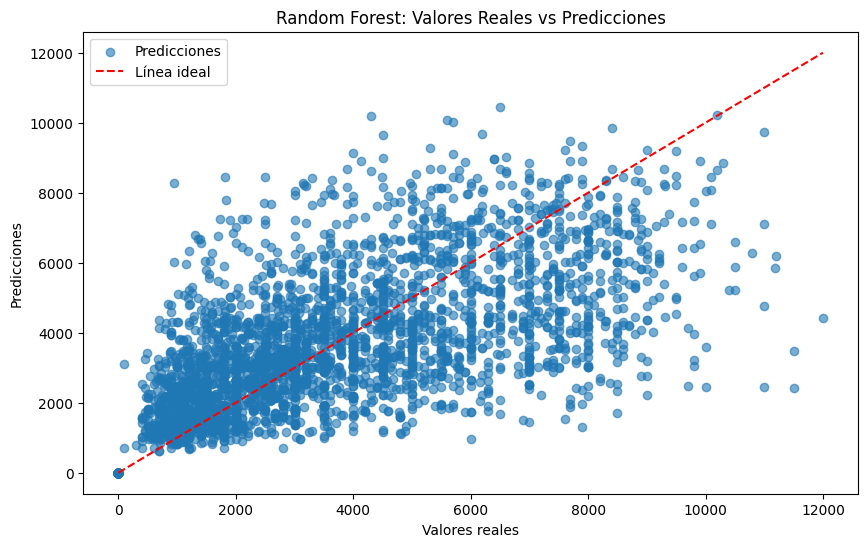

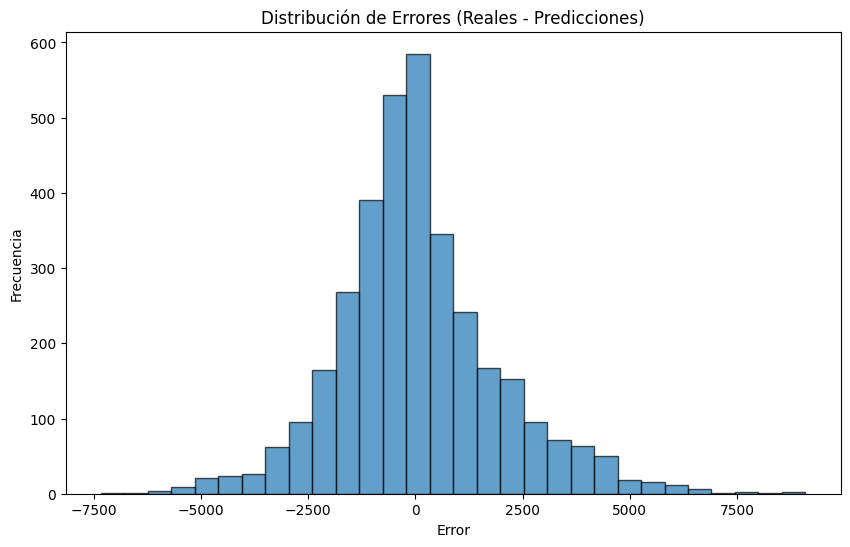

In [17]:
# Visualizar los valores reales frente a las predicciones
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Línea ideal')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Random Forest: Valores Reales vs Predicciones')
plt.legend()
plt.show()

# Distribución de errores
errors = y_test - y_pred_rf
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribución de Errores (Reales - Predicciones)')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.show()


# Interpretación de visualizaciones

## Valores reales vs. predicciones:
- La nube de puntos muestra que el modelo predice valores razonablemente bien para la mayoría de los casos, aunque hay **dispersiones** para algunos valores altos de rendimiento.
- La línea roja representa una **predicción perfecta**; los puntos cercanos a esta línea indican **buenas predicciones**.

## Distribución de errores:
- Los errores siguen una distribución **aproximadamente simétrica** alrededor de cero, lo que sugiere que el modelo no tiene un **sesgo significativo**.
- Sin embargo, algunos errores son **grandes**, probablemente debido a:
  - **Valores atípicos**.
  - **Características no incluidas** en el modelo.


# Conclusiones

- El modelo **Random Forest** tiene un desempeño decente y logra explicar una parte de la variabilidad en el **rendimiento de maíz**.
- Podría **mejorar** si se incorporan más **características relevantes**, como:
  - **Condiciones climáticas**.
  - **Tipo de suelo**.  
  Estas variables probablemente influyen de manera significativa en el rendimiento agrícola.
